#### 1. Problem Statement:
###### Based upon the attributes,predict whether the person is survived or not.

###### 2.Analytic Approach->Classification(Survived->DV->Categorical)

#### 3.Data Understanding
##### PassengerID->Not required 
##### Survived-> DV(0 0r 1->0 means not survived and 1 means survived)-> Categorical
##### Pclass-> Passenger class->Categorical(First class,Second class,...)
##### Name-> Not required
##### Sex->(Categorical)
##### Age->Numerical
##### Sibsp->Sibling Spouse->Numerical
##### parch->parent child -> Numerical
##### Ticket->Not required
##### Fare-> Not required
##### Cabin-> Object
##### Embarked-> Port(Categorical)

In [129]:
### Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [130]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/edForce/main/titanic-training-data.csv")

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data exploration


In [132]:
df.shape

(891, 12)

##### There are 891 observations and 12 columns
##### Out of 12 columns,one column is dependent variable and remaining 11 are independent variables
##### Survived(Dep variable)->y

In [133]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Missing values->Age,Embarked,Cabin

In [135]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Age->177(Mean/Median-> since numerical),Embarked(Mode-> since it is object),cabin->more missing values->Drop it

<AxesSubplot:xlabel='Survived', ylabel='count'>

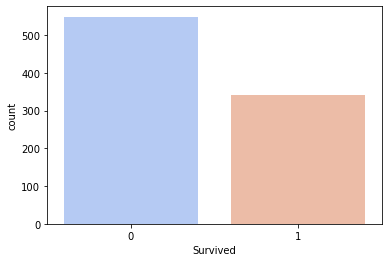

In [136]:
sns.countplot(x="Survived",data=df,palette="coolwarm")

In [137]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

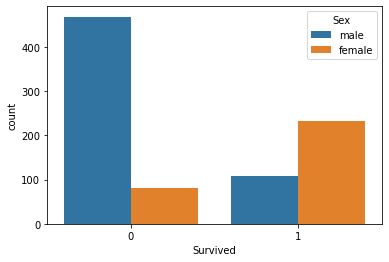

In [138]:
sns.countplot(x="Survived",hue="Sex",data=df)

In [139]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

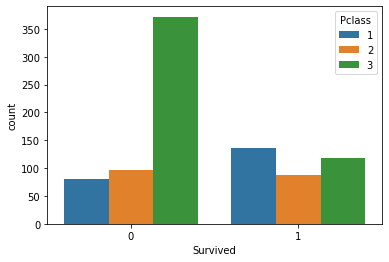

In [140]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [141]:
pd.crosstab(df["Survived"],df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

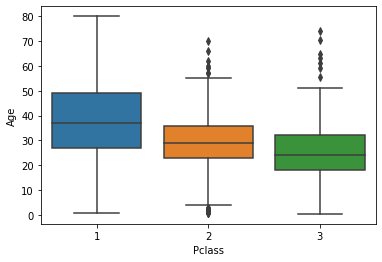

In [142]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [143]:
df=df.drop("Cabin",axis=1)

In [144]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [145]:
##### Drop the missing values
df=df.dropna()

In [146]:
df.shape

(712, 11)

In [147]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [148]:
df=pd.get_dummies(columns=["Sex","Embarked","Pclass"],data=df)

In [149]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [150]:
df=df.drop(["PassengerId","Name","Ticket","Fare"],axis=1)

In [151]:
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [152]:
#### Split into X and Y
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [153]:
#### Training and Testing split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [154]:
#### Apply Logistic Regression model
model_1=LogisticRegression()

In [155]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [156]:
model_1.score(X_train,Y_train)

0.8052208835341366

In [157]:
model_1.score(X_test,Y_test)

0.780373831775701

In [105]:
### Approach 2

In [110]:
#### Replacing the age column with median and embarked with mode
mean1=df["Age"].mean()
df["Age"]=df["Age"].replace(np.nan,mean1)

In [111]:
mode1=df["Embarked"].mode().values[0]
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [112]:
df.shape

(891, 12)

In [113]:
df=df.drop("Cabin",axis=1)

In [114]:
df=pd.get_dummies(columns=["Sex","Embarked","Pclass"],data=df)

In [115]:
df=df.drop(["PassengerId","Name","Ticket","Fare"],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [116]:
#### Split into X and Y
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [117]:
#### Training and Testing split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [118]:
#### Apply Logistic Regression model
model_2=LogisticRegression()

In [119]:
model_2.fit(X_train,Y_train)

LogisticRegression()

In [120]:
model_2.score(X_train,Y_train)

0.812199036918138

In [121]:
model_2.score(X_test,Y_test)

0.7798507462686567

### Drop missing values : Train(80%)     Test(78%)
### Median and mode     : Train(81%)     Test(77%)
### Mean and mode       : Train(81%)     Test(77%)

In [171]:
predictions=model_2.predict(X_test)

In [172]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [173]:
accuracy_score(Y_test,predictions)

0.794392523364486

<AxesSubplot:>

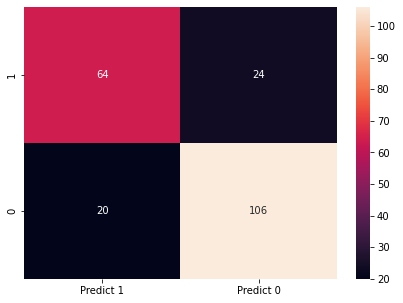

In [174]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [1]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_3=DecisionTreeRegressor()


In [ ]:
model_3.fit(X_train,y_train)

In [ ]:
model_3.score(X_train,y_train)

In [ ]:
model_3.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostregressor

In [ ]:
model_4=AdaBoostregressor()

In [ ]:
model_4.fit(X_train,y_train)

In [ ]:
model_4.score(X_train,y_train)

In [ ]:
model_4.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_5=GradientBoostingregressor()

In [ ]:
model_5.fit(X_train,y_train)

In [ ]:
model_5.score(X_train,y_train)

In [ ]:
model_5.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.svm import SVR
model_7=SVR()